In [ ]:
Q1. Theory and Concepts
Explain the concept of batch normalization in the context of Artificial Neural Networks:
Batch normalization is a technique used to improve the training performance and stability of 
artificial neural networks by normalizing the input of each layer.
It reduces internal covariate shift, which refers to the change in the distribution of layer inputs 
as network parameters change during training.

In [ ]:
Describe the benefits of using batch normalization during training:
Faster Convergence: By normalizing the input to each layer, batch normalization allows the model to converge faster, 
                    reducing the training time.
Higher Learning Rates: It allows the use of higher learning rates without the risk of unstable gradients, 
                     accelerating the optimization process.
Reduced Overfitting: Batch normalization has a slight regularization effect, reducing the need for 
                    other regularization techniques like dropout.
Mitigates Vanishing/Exploding Gradients: By normalizing the inputs, batch normalization helps control the 
                    range of values in the network, reducin issues with vanishing   or exploding gradients in deep networks

In [ ]:
Discuss the working principle of batch normalization, including the normalization step and the learnable parameters:

1. Normalization Step:
    For each mini-batch, batch normalization normalizes the input by subtracting the batch 
    mean and dividing by the batch standard deviation to ensure the inputs have zero mean and unit variance.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: Normalize the pixel values (0-255) to the range (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to match the input of the neural network (28x28 images to 784 vectors)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple feedforward neural network (without batch normalization)
model_no_bn = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_no_bn = model_no_bn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


C:\Users\Pratik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8391 - loss: 0.5918 - val_accuracy: 0.9492 - val_loss: 0.1692
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9592 - loss: 0.1457 - val_accuracy: 0.9645 - val_loss: 0.1194
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9710 - loss: 0.0988 - val_accuracy: 0.9707 - val_loss: 0.0959
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0738 - val_accuracy: 0.9721 - val_loss: 0.0895
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9747 - val_loss: 0.0809
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0467 - val_accuracy: 0.9773 - val_loss: 0.0712
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0364 - val_accuracy: 0.9755 - val_loss: 0.0839
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.

In [3]:
from tensorflow.keras.layers import BatchNormalization

# Create the neural network with batch normalization layers
model_with_bn = Sequential([
    Dense(128, input_shape=(784,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the model
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_bn = model_with_bn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8541 - loss: 0.4947 - val_accuracy: 0.9557 - val_loss: 0.1610
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9573 - loss: 0.1493 - val_accuracy: 0.9646 - val_loss: 0.1250
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9697 - loss: 0.1068 - val_accuracy: 0.9669 - val_loss: 0.1104
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0856 - val_accuracy: 0.9680 - val_loss: 0.1143
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9791 - loss: 0.0714 - val_accuracy: 0.9722 - val_loss: 0.0977
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0588 - val_accuracy: 0.9735 - val_loss: 0.0904
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0521 - val_accuracy: 0.9715 - val_loss: 0.0919
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.

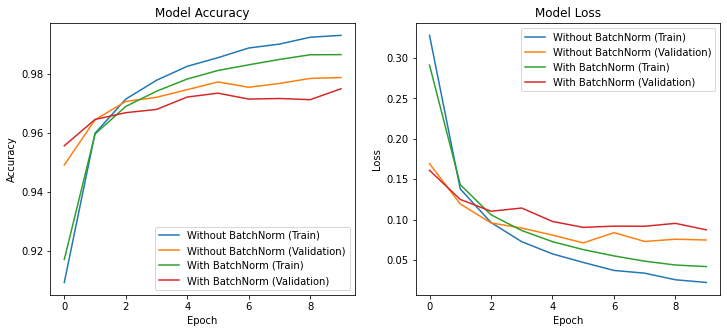

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['accuracy'], label='Without BatchNorm (Train)')
plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm (Validation)')
plt.plot(history_with_bn.history['accuracy'], label='With BatchNorm (Train)')
plt.plot(history_with_bn.history['val_accuracy'], label='With BatchNorm (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['loss'], label='Without BatchNorm (Train)')
plt.plot(history_no_bn.history['val_loss'], label='Without BatchNorm (Validation)')
plt.plot(history_with_bn.history['loss'], label='With BatchNorm (Train)')
plt.plot(history_with_bn.history['val_loss'], label='With BatchNorm (Validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
